# Comparison of Integration, Zonal vs G. Smith
2D zonal integration with unordered data, Greg A. Smith https://doi.org/10.1364/AO.426162

In [2]:
import SHSlib  as sh
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

P = sh.analyse.Processor(floorCap = 40,
              minDist = 30,
              NZernike = 9,
              storeImages=True,
              printZernikeEqasion = False,
              normZernike=False,
              scaleToUnitCircle = True,
              showWarnings = False)

# analyses with Zernike Integration
P.loadFile("Sample#9_withLensInRay.hdf5")

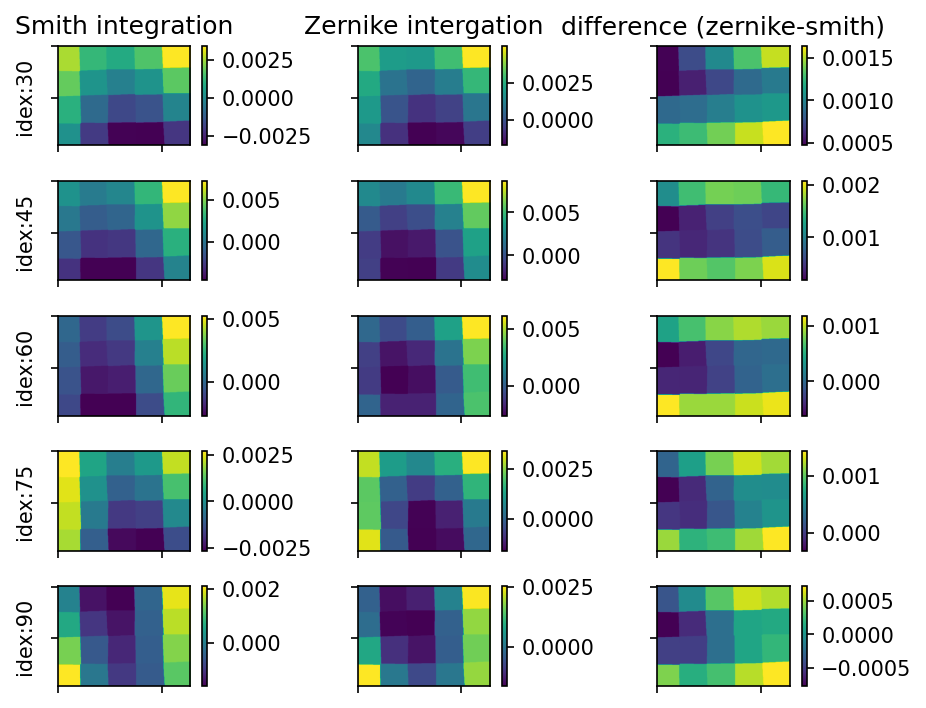

In [3]:
NimageIndex = np.arange(30,100,15)
fig,axs = plt.subplots(len(NimageIndex),3,dpi=150)

# contruction of Transormation matrix for integrtaion
# by setting desiered Sample positon and gradient/measurmente data position
# in this case sample positon is set to be also measurmente positon
D = sh.analyse.getIntegration(P.refCentroids[0],
    P.refCentroids[1],
    P.refCentroids[0],
    P.refCentroids[1],
    NPartner=20)

# loop over some measurmenst
for i,imageIndex in enumerate(NimageIndex):
    
    # gradient data vector
    G = np.concatenate([P._dxList[imageIndex],P._dyList[imageIndex]])
    
    #integration with tranformation and geradient data
    Z  = np.linalg.lstsq(D,G,rcond=None)[0]
    
    # Map integratoin data in correct positon in image space
    wavefront = np.zeros_like(P.refLabels, dtype=np.double())
    for CIndex in range(len(P.refCentroids[1])):
        wavefront[P.refLabels == CIndex + 1] = Z[CIndex]
    
    # Plot Data in Grid
    c = axs[i,0].imshow(wavefront);plt.colorbar(c,ax=axs[i,0],shrink=1)
    axs[i,0].set_yticklabels([])
    axs[i,0].set_xticklabels([])
    axs[i,0].set_ylabel("idex:" + str(imageIndex))
    
    c = axs[i,1].imshow(P.Wavefront[imageIndex]); plt.colorbar(c,ax=axs[i,1],shrink=1)
    axs[i,1].set_yticklabels([])
    axs[i,1].set_xticklabels([])
    
    c = axs[i,2].imshow(P.Wavefront[imageIndex] - wavefront); plt.colorbar(c,ax=axs[i,2],shrink=1)
    axs[i,2].set_yticklabels([])
    axs[i,2].set_xticklabels([])

axs[0,0].set_title("Smith integration")
axs[0,1].set_title("Zernike intergation")
axs[0,2].set_title("difference (zernike-smith)")
plt.tight_layout(pad=1)
fig.savefig("comparison Smith to Zernike Integration.png",dpi=300)